In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [8]:
df = pd.read_csv("laptops_10.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   Product        1303 non-null   object 
 2   TypeName       1303 non-null   object 
 3   Inches         1303 non-null   float64
 4   Cpu            1303 non-null   object 
 5   Ram            1303 non-null   object 
 6   Gpu            1303 non-null   object 
 7   OpSys          1303 non-null   object 
 8   Weight         1303 non-null   float64
 9   Price_euros    1303 non-null   float64
 10  Cpu_Company    1303 non-null   object 
 11  Memory_Amount  1303 non-null   int64  
 12  Memory_Type    1303 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 132.5+ KB


In [10]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


## Задача 1.1.
Изучите распределение количества памяти (Memory_Amount) с помощью matplotlib

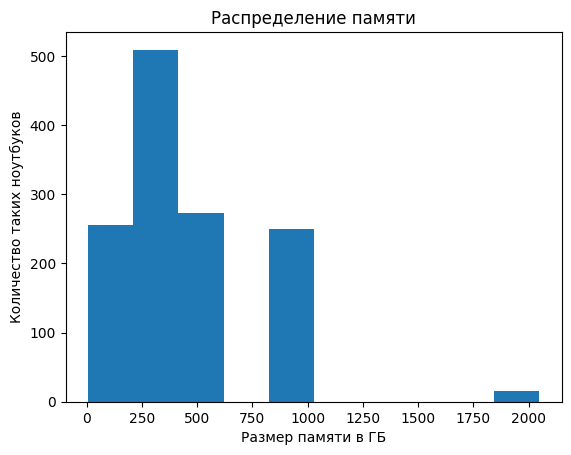

In [11]:
plt.hist(df['Memory_Amount'])
plt.title("Распределение памяти")
plt.xlabel("Размер памяти в ГБ")
plt.ylabel("Количество таких ноутбуков");


## задача 1.2 Изучите распределение стоимости ноутбуков (Price_euros) с помощью matplotlib

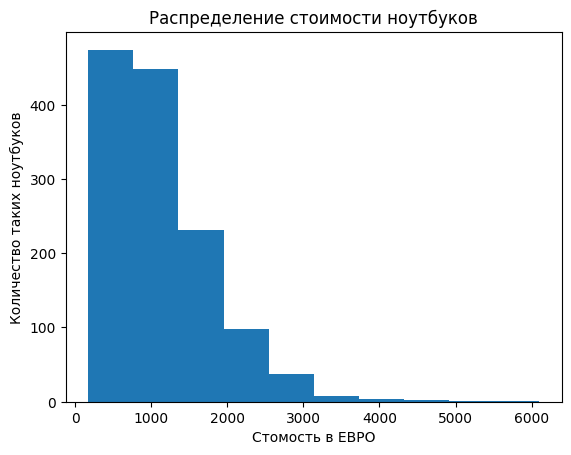

In [12]:
plt.hist(df['Price_euros'])
plt.title("Распределение стоимости ноутбуков")
plt.xlabel("Стомость в ЕВРО")
plt.ylabel("Количество таких ноутбуков");

## Задача 1.3 Изучите распределение веса ноутбуков (Weight) с помощью matplotlib

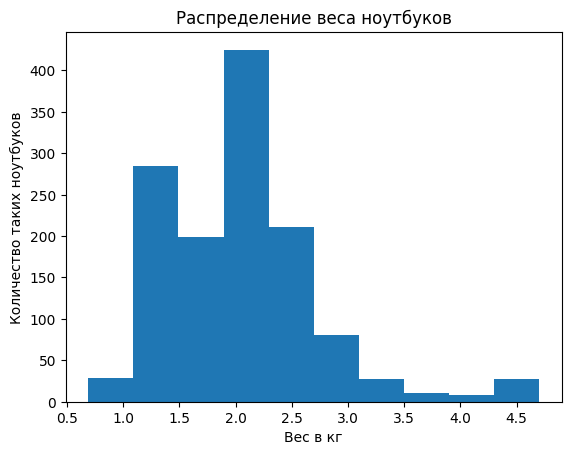

In [13]:
plt.hist(df['Weight'])
plt.title("Распределение веса ноутбуков")
plt.xlabel("Вес в кг")
plt.ylabel("Количество таких ноутбуков");

## 2.1 Изучите распределение типов носителя (Memory_Type)

In [14]:
data_memory = df['Memory_Type'].value_counts()
data_memory

Memory_Type
SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: count, dtype: int64

In [16]:
names = data_memory.index
values = data_memory.values

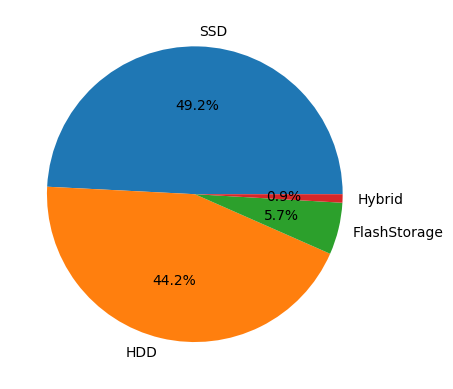

In [17]:
plt.pie(values, autopct='%.1f%%', labels = names); # значение (цвета), процент, название поставили

## 2.2 Изучите распределение компаний производителей (Company)

In [18]:
data= df['Company'].value_counts()
data

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [19]:
names = data.index
values = data.values

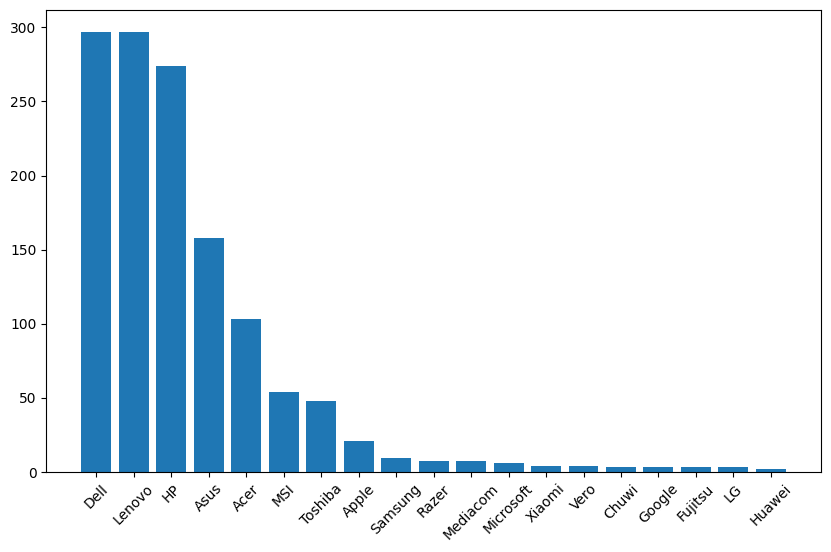

In [20]:
plt.figure(figsize=(10,6))
plt.bar(names, values)
plt.xticks(rotation = 45);

# Задача 3
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах
3.2 Постройте график в относительных величинах


In [21]:
data = pd.crosstab(index = df['Company'], columns=df['Cpu_Company']) # Cpu_Company это процессоры
data

Cpu_Company,AMD,Intel,Samsung
Company,,,
Acer,10,93,0
Apple,0,21,0
Asus,11,147,0
Chuwi,0,3,0
Dell,0,297,0
Fujitsu,0,3,0
Google,0,3,0
HP,25,249,0
Huawei,0,2,0


In [22]:
data = data.drop(columns = ['Samsung'] ).reset_index() # убрали колонкуSamsung и reset_index() перезапустить индексы, чтобы не сбивалось нумерация
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


In [23]:
import numpy as np

In [24]:
n_ticks = np.arange(len(data['AMD']))

In [25]:
offset = 0.2
w = 0.4

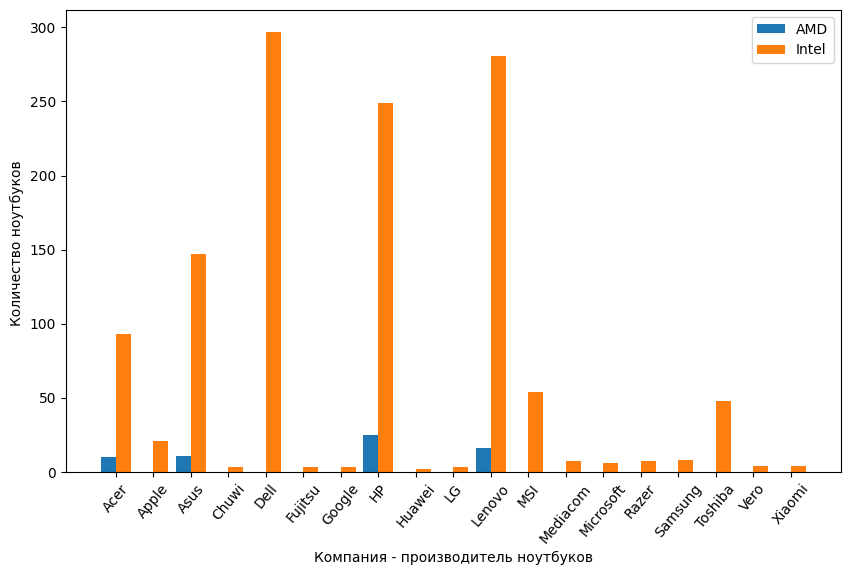

In [26]:
plt.figure(figsize = (10,6))
plt.bar(n_ticks - offset, data['AMD'], width = w) # - слева 
plt.bar(n_ticks + offset, data["Intel"], width = w) # + справа
plt.xlabel('Компания - производитель ноутбуков')
plt.ylabel("Количество ноутбуков ")
plt.legend(['AMD', 'Intel'])
plt.xticks (n_ticks, data['Company'], rotation = 50) ;

3.2 Постройте график в относительных величинах

In [28]:
data = pd.crosstab(index = df['Company'], columns=df['Cpu_Company'], normalize = 'index') # normalize = 'index'- это сделали в относит величинах
data = data.drop(columns = ['Samsung'] ).reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


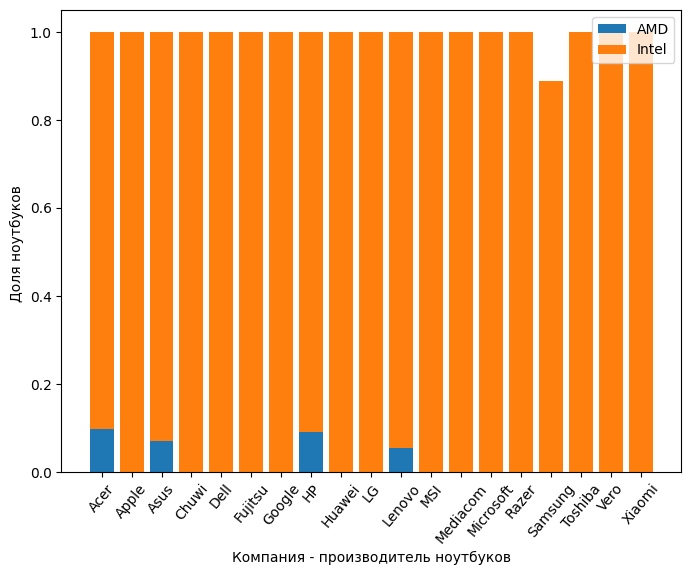

In [29]:
plt.figure(figsize = (8,6))
plt.bar(data['Company'], data['AMD'])
plt.bar(data['Company'], data['Intel'], bottom = data['AMD'])
plt.xlabel('Компания - производитель ноутбуков')
plt.ylabel("Доля ноутбуков ")
plt.legend(['AMD', 'Intel'])
plt.xticks(rotation = 50);

## 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

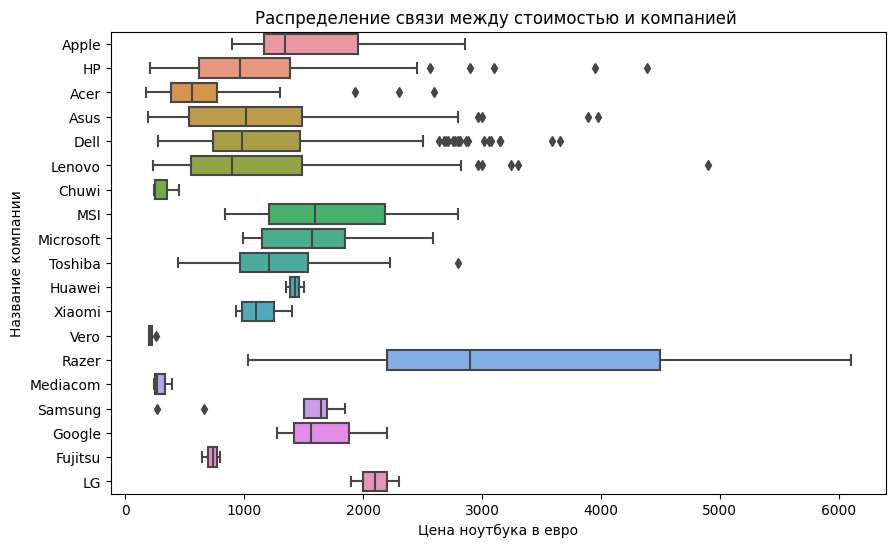

In [30]:
plt.figure(figsize = (10,6))
seaborn.boxplot(x = df['Price_euros'], y = df["Company"], whis = 1.5)
plt.xlabel("Цена ноутбука в евро")
plt.ylabel("Название компании")
plt.title("Распределение связи между стоимостью и компанией "); #  здесь не видим колво видим

In [54]:
df['Company'].value_counts() # здесь колво видим

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

## Постройте матрицу корреляций для таблицы - это взаимозависимость пример- рост и вес, друг от друга зависят

In [33]:
corr_matrix = df.corr(numeric_only=True) #  получили коррел-ую матрицу, обработалась датасэд и получилась количественная величина как одно зависит от другого
corr_matrix = np.round(corr_matrix, 1) # округляем каждое значение до одного знака после запятой
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 # уберем те значения, если корреляция очень маленькая
corr_matrix # выводим на экран, видим от веса Weight зависит и диагональ Inches.


,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.0,0.3
Weight,0.8,1.0,0.0,0.0
Price_euros,0.0,0.0,1.0,0.0
Memory_Amount,0.3,0.0,0.0,1.0


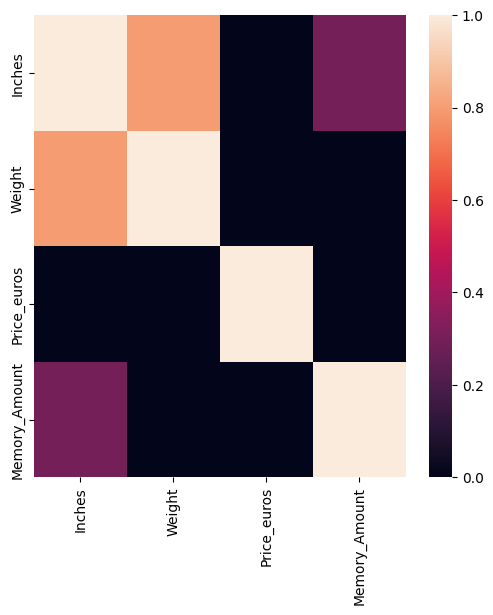

In [34]:
plt.figure(figsize = (6,6))
seaborn.heatmap(corr_matrix); # seaborn-тепловая карта, чем цвет светлее , тем коррел-ция выше, здесь вес и размер экрана сильно коррелирует